In [1]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [2]:
n=100

In [3]:
x = torch.ones(n,4) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.1993,  1.0000,  1.0000,  1.0000],
        [-0.3913,  1.0000,  1.0000,  1.0000],
        [ 0.0785,  1.0000,  1.0000,  1.0000],
        [ 0.4789,  1.0000,  1.0000,  1.0000],
        [-0.0294,  1.0000,  1.0000,  1.0000]])

In [4]:
x = torch.index_select(x, 1, torch.tensor([0,0,0,2]))

In [5]:
x[:,0].apply_(lambda a: 3*a**3)
x[:,1].apply_(lambda a: -2*a**2)
x[:5]

tensor([[-2.3739e-02, -7.9420e-02, -1.9927e-01,  1.0000e+00],
        [-1.7968e-01, -3.0616e-01, -3.9125e-01,  1.0000e+00],
        [ 1.4496e-03, -1.2315e-02,  7.8471e-02,  1.0000e+00],
        [ 3.2951e-01, -4.5870e-01,  4.7890e-01,  1.0000e+00],
        [-7.6248e-05, -1.7289e-03, -2.9401e-02,  1.0000e+00]])

In [6]:
a = tensor(3.,1.,2.,4.); a

tensor([3., 1., 2., 4.])

In [7]:
y = x@a + (torch.rand(n) * 6)

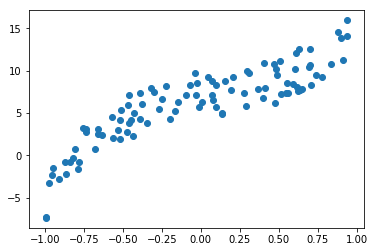

In [8]:
plt.scatter(x[:,2], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [9]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [10]:
a = tensor(-1.,1,-1,1)

In [41]:
y_hat = x@a
mse(y_hat, y)

tensor(2.5860, grad_fn=<MeanBackward0>)

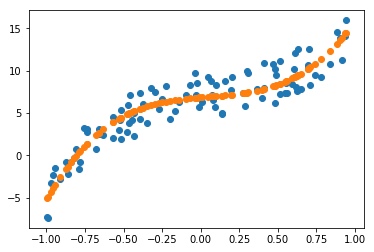

In [42]:
plt.scatter(x[:,2],y)
plt.scatter(x[:,2],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [73]:
y_hat = x@a
a = nn.Parameter(a); a

Parameter containing:
tensor([2.9093, 1.0143, 1.6493, 7.0708], requires_grad=True)

In [74]:
mu = nn.Parameter(torch.zeros(a.shape));
momentumFactor = 0.9;

In [81]:
def update():
    y_hat = x@a
    print(y_hat)
    loss = mse(y, y_hat)
    loss.backward()
    with torch.no_grad():
        gradient = lr * a.grad
#         mu = mu * momentumFactor - (1 - momentumFactor) * a.grad
        a.sub_(lr * a.grad )
        a.grad.zero_()

In [82]:
lr = 1e-1
for t in range(2): update()

tensor([ 6.6069,  5.5918,  7.2249,  8.3827,  7.0472, -0.2038,  7.6754,  4.4323,
         4.8899,  8.4060,  6.9642,  5.0108, 10.3369,  7.2547,  8.5765, 10.2363,
        -0.4250,  7.0276,  8.8459,  3.9030,  9.6650,  6.3221,  7.4177,  7.3181,
         7.4342,  4.4389,  7.1766,  6.1821, 13.2186,  9.3418,  9.2774, 12.8617,
         2.5886, -5.1822,  5.1379,  7.1173,  9.5346, -5.0388,  0.2418,  7.2129,
         7.0545,  2.3080, 10.6783, 13.4801,  5.9025, 13.9898,  4.9413, -2.6882,
         8.9130,  7.9859,  8.4486,  9.1662,  2.5971,  9.5227,  5.2462,  7.2508,
         7.3468,  9.4556, 12.0930,  6.0594,  6.5103,  5.5893,  1.2509,  7.0754,
         5.0259, -3.6562,  0.8545,  8.3418,  6.7270, 10.2058, 11.2436,  8.8162,
         9.4073,  7.5918,  7.6241,  6.9175,  7.3150,  3.0305,  7.6495,  8.0540,
         5.2908, -1.4461,  7.8697,  3.8797,  6.7851, -4.4581,  8.0350, -1.6989,
        -0.9544,  7.2107, -4.0057,  5.7166,  1.2487, 10.1517,  4.3085,  6.4170,
         0.4044,  8.5847, 13.9696,  4.49

UnboundLocalError: local variable 'mu' referenced before assignment

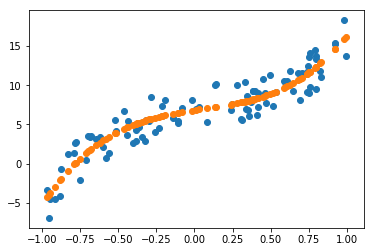

In [219]:
plt.scatter(x[:,2],y)
plt.scatter(x[:,2],x@a);

## Animate it!

In [220]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [221]:
a = nn.Parameter(tensor(-1.,1,-1,1))

fig = plt.figure()
plt.scatter(x[:,2], y, c='orange')
line, = plt.plot(x[:,2], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.